In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 KB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
Note: you may need to restart the kernel to use updated packages.


In [70]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output


sns.set(style="white", color_codes=True)

iris = sns.load_dataset("iris") #İris veri setini internet üzerinde alıyoruz.
# Let's see what's in the iris data - Jupyter notebooks print the result of the last thing you do
iris.head()

# Press shift+enter to execute this cell

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
# Let's see how many examples we have of each species
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

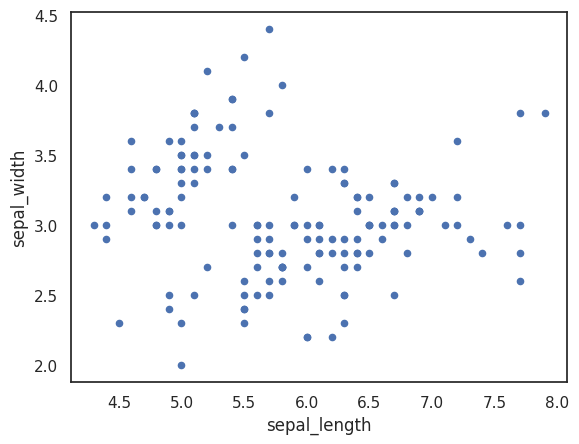

In [19]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter" , x = "sepal_length" , y="sepal_width")

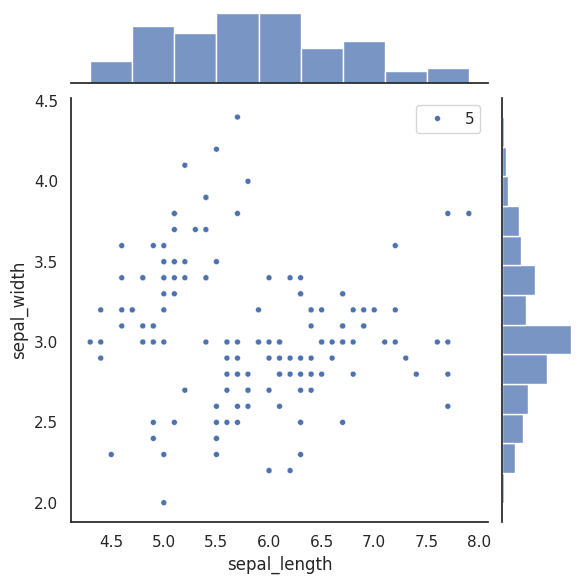

In [21]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="sepal_length" , y="sepal_width" , data=iris , size=5)

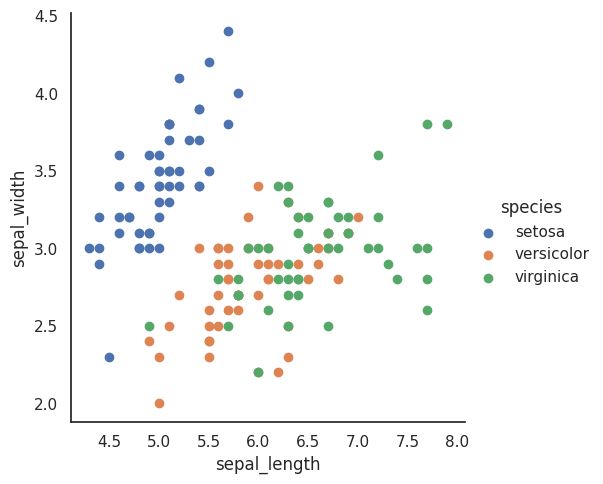

In [23]:
sns.FacetGrid(iris, hue="species", height=5) \
    .map(plt.scatter, "sepal_length", "sepal_width") \
    .add_legend()

<Axes: xlabel='species', ylabel='petal_length'>

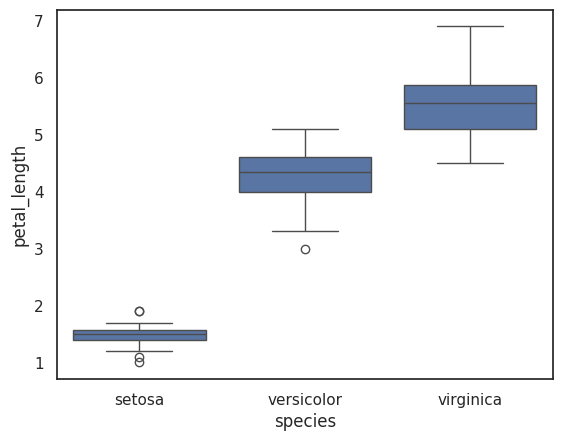

In [24]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="species", y="petal_length",data=iris)

<Axes: xlabel='species', ylabel='petal_length'>

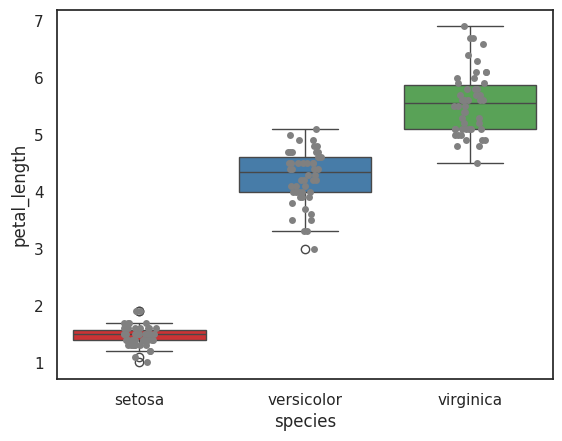

In [29]:
my_palette = "Set1"
ax = sns.boxplot(x="species", y="petal_length", data=iris, palette=my_palette)
#stripplot is a function in Seaborn used to visualize the relationship between a categorical variable and a numerical variable. 
#It displays individual data points distributed along the categories of the categorical variable on a horizontal axis.
sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, color="gray", ax=ax)

<Axes: xlabel='species', ylabel='petal_length'>

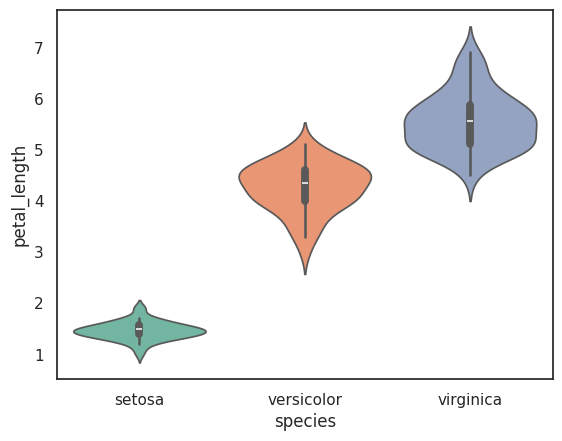

In [33]:
#A violin plot is a type of graph used to visualize the distribution of data. 
#It shows the distribution of quantitative data across different categories. 
#This plot combines the features of a box plot and a kernel density plot.
sns.violinplot(x="species", y="petal_length", data=iris, scale="width", palette="Set2")

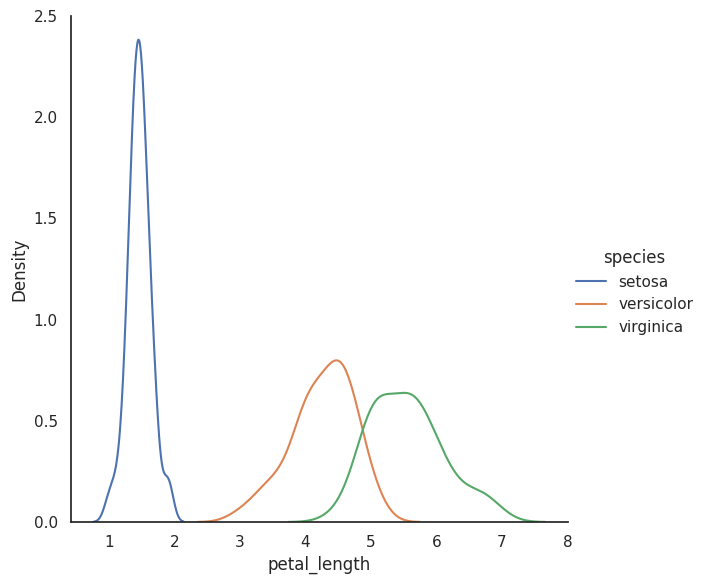

In [35]:
#allows you to create multiple plots (facets) based on categorical variables in your dataset
g = sns.FacetGrid(iris, hue="species", height=6)
g.map(sns.kdeplot, "petal_length")
#This line adds a legend to explain the colors used in the plotted graphs, associating them with different species.
g.add_legend()

<Axes: xlabel='species', ylabel='petal_length'>

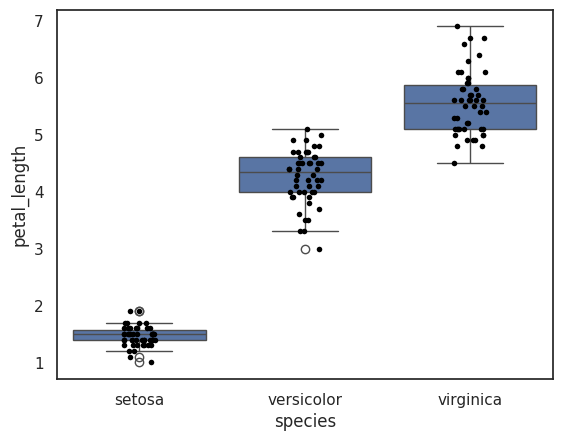

In [36]:
sns.boxplot(x="species", y="petal_length", data=iris)
sns.stripplot(x="species", y="petal_length", data=iris, color="black", size=4, jitter=True)

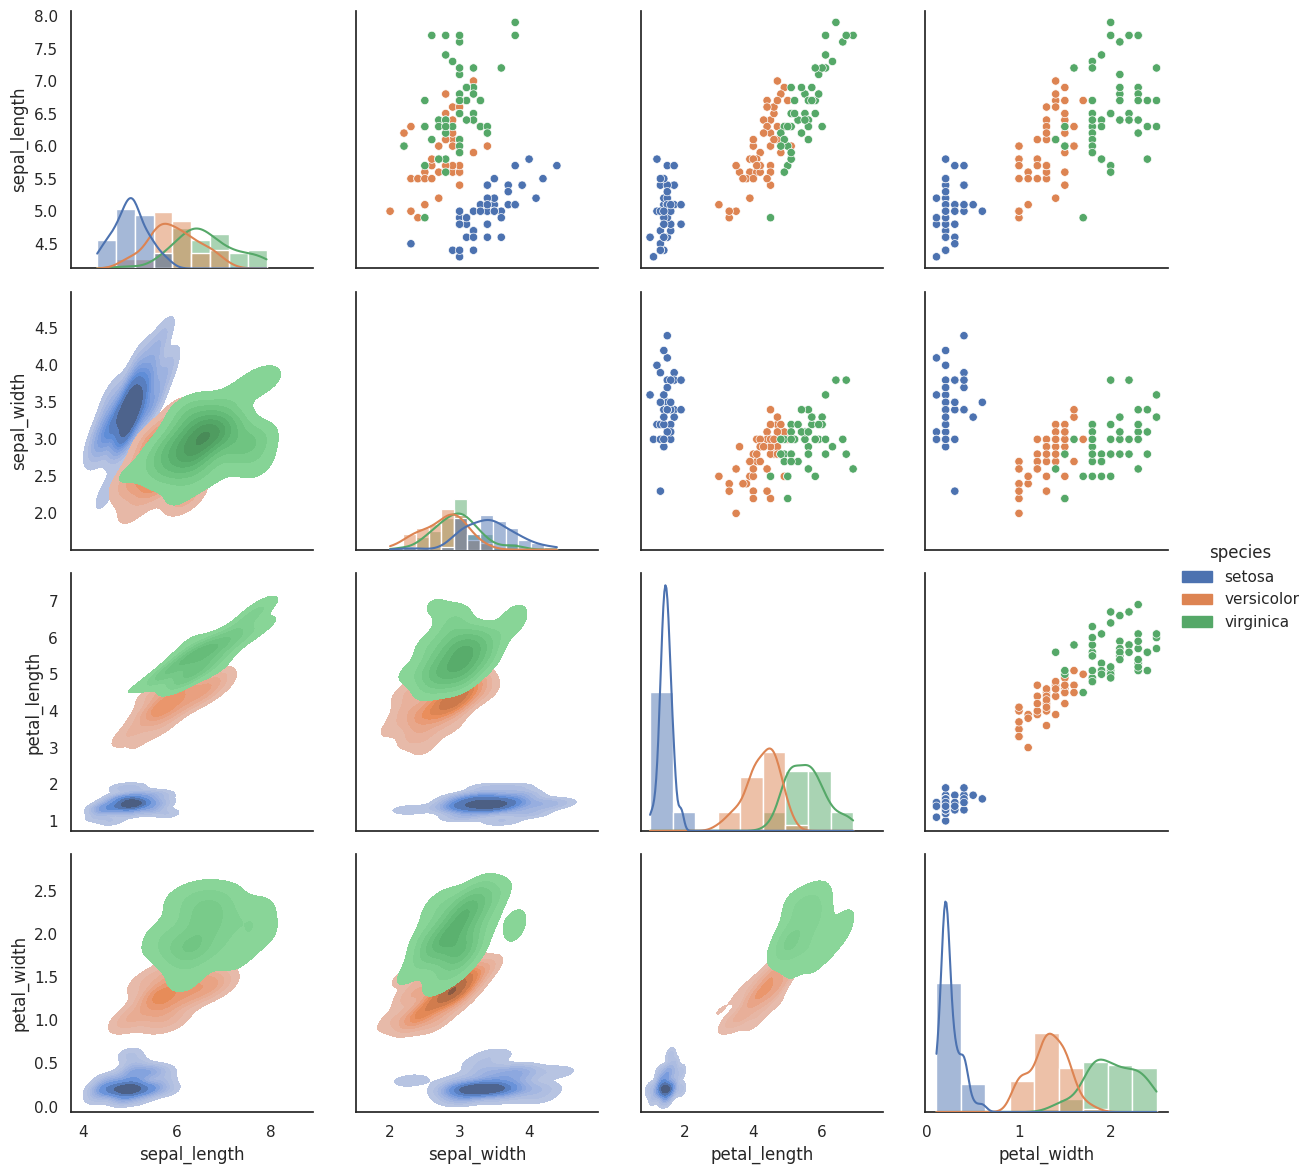

In [42]:
#This code allows you to explore the distribution of data in more detail and analyze the
#relationships between different variables more comprehensively.
g = sns.PairGrid(iris, hue="species", height=3)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

g.add_legend()

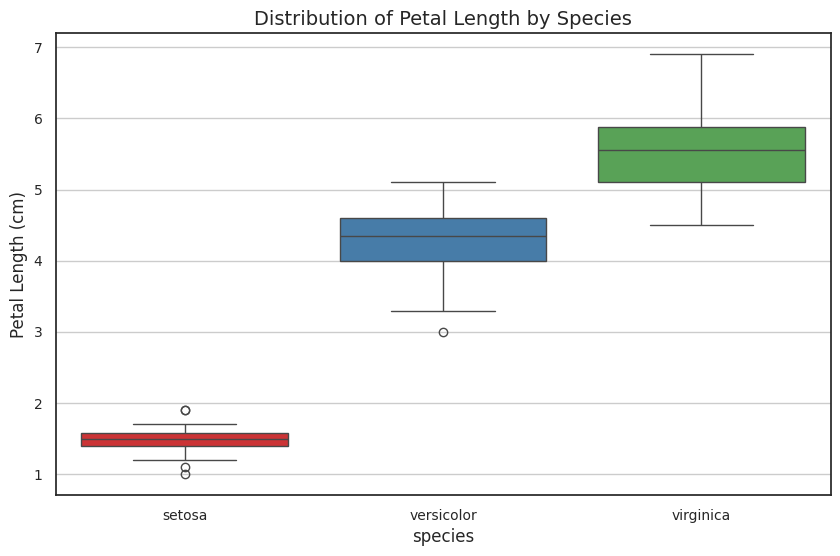

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris, x="species", y="petal_length", palette="Set1")

plt.xlabel("species", fontsize=12)
plt.ylabel("Petal Length (cm)", fontsize=12)
plt.title("Distribution of Petal Length by Species", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y') 

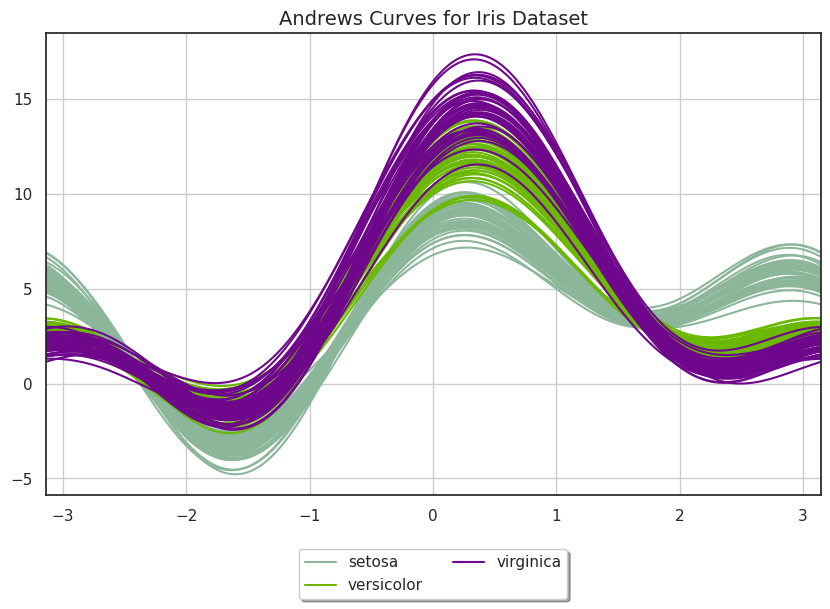

In [56]:
from pandas.plotting import andrews_curves

# Plotting Andrews Curves
plt.figure(figsize=(10, 6))
andrews_curves(iris, "species")

# Adjusting graph details
plt.title("Andrews Curves for Iris Dataset", fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)# Adding a legend for multiple classes


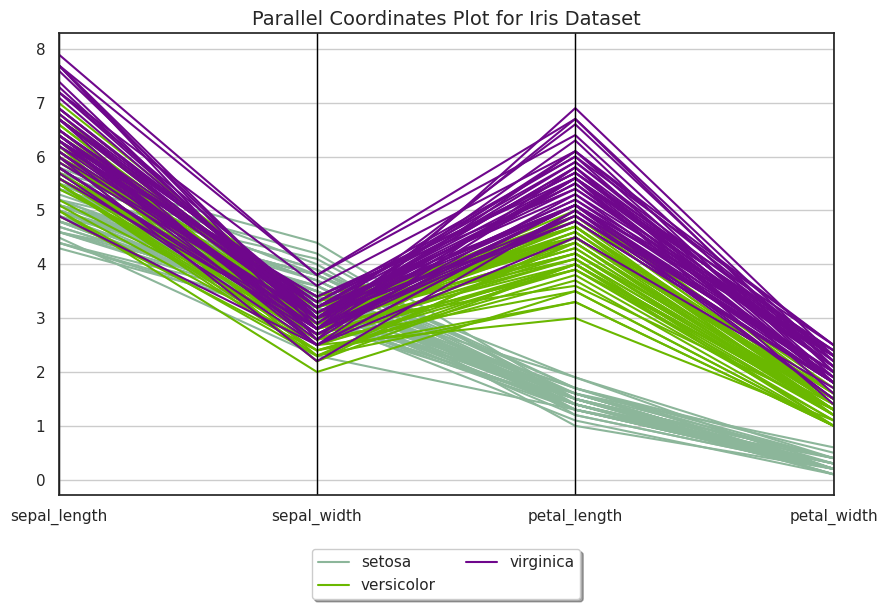

In [62]:
from pandas.plotting import parallel_coordinates
# Parallel coordinates plot
# Plotting Andrews Curves
plt.figure(figsize=(10, 6))
parallel_coordinates(iris, "species")

# Graph adjustments
plt.title("Parallel Coordinates Plot for Iris Dataset", fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)  # Adding legend for multiple classes


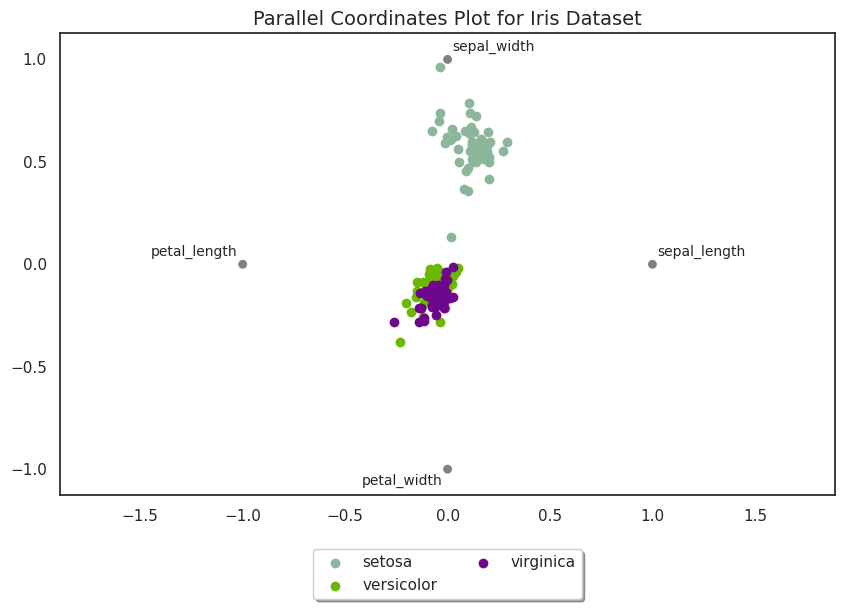

In [64]:
from pandas.plotting import radviz
plt.figure(figsize=(10, 6))
radviz(iris, "species")

# Graph adjustments
plt.title("Parallel Coordinates Plot for Iris Dataset", fontsize=14)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), shadow=True, ncol=2)  # Adding legend for multiple classes


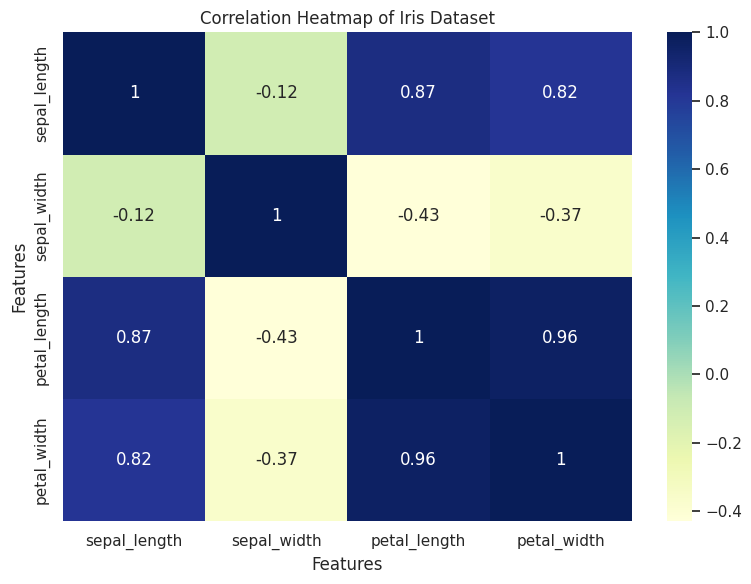

In [68]:
#A heatmap is an effective visualization tool used to represent numerical data in a matrix format. 
#It displays the density of data using colors, where different colors represent different data values. 
#Typically, it's utilized to visualize patterns, correlations, or trends within a dataset.
plt.figure(figsize=(8, 6))  # Adjust the figure size
sns.heatmap(
    iris.drop("species", axis=1).corr(),
    annot=True,
    cmap="YlGnBu",  # Experiment with different colormaps for better visibility
)
plt.title('Correlation Heatmap of Iris Dataset')  # Add a descriptive title
plt.xlabel('Features')  # Label the x-axis
plt.ylabel('Features')  # Label the y-axis
plt.tight_layout()  # Improve layout and spacing

In [75]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train, test = train_test_split(iris, test_size=0.3, random_state=42)  # Specify the random_state for reproducibility

In [78]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y =test.species   #output value of test data

In [79]:
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5


In [80]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3


In [81]:
train_y.head()  ##output of the training data

81     versicolor
133     virginica
137     virginica
75     versicolor
109     virginica
Name: species, dtype: object

In [86]:
#The Support Vector Machine (SVM) classifier is a supervised learning algorithm used for classification tasks. 
#It aims to find the optimal hyperplane that best separates different classes in the feature space. 
#SVM works by identifying the decision boundary, or hyperplane, with the maximum margin between classes, 
#allowing it to handle both linear and non-linear classification problems by using different kernel functions. 
#It's effective in high-dimensional spaces and is robust against overfitting, making it a popular choice for various machine learning tasks.
from sklearn import svm, metrics

# Create and train the model
model = svm.SVC()
model.fit(train_X, train_y)

# Making predictions
prediction = model.predict(test_X)

# Calculating accuracy
accuracy = metrics.accuracy_score(prediction, test_y)

# Get the number of correct classifications and total test samples
correct_classification = metrics.accuracy_score(prediction, test_y, normalize=False)
total_test_samples = len(test_y)

# Print the results
print('Accuracy:', accuracy)
print('Correct classifications:', correct_classification, 'out of', total_test_samples)


Accuracy: 1.0
Correct classifications: 45 out of 45


In [90]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_X,train_y)
prediction = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(test_y, prediction))


The accuracy of the Logistic Regression is 1.0


In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(train_X,train_y)

# Make predictions using the test data
prediction = model.predict(test_X)


# Calculate and print the accuracy of the Decision Tree model
accuracy = metrics.accuracy_score(prediction,test_y)
print('The accuracy of the Decision Tree is', accuracy)



The accuracy of the Decision Tree is 1.0


In [101]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(train_X, train_y)
prediction = model.predict(test_X)

print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 1.0


In [112]:
petal=iris[['petal_length','petal_width','species']]
sepal=iris[['sepal_length','sepal_width','species']]

In [120]:
train_p , test_p = train_test_split(petal , test_size = 0.3, random_state = 0)

train_x_p = train_p[['petal_width','petal_length']]
train_y_p = train_p.species

test_x_p = test_p[['petal_width','petal_length']]
test_y_p = test_p.species

train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal

train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species

test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species



In [122]:
# Support Vector Machine (SVM) classifier instantiation using petal features
model = svm.SVC()
# Training the SVM model with petal features
model.fit(train_x_p, train_y_p)
# Making predictions using the trained model on test data with petal features
prediction = model.predict(test_x_p)
# Printing the accuracy of SVM when using petal features
print('The accuracy of the SVM using Petals is:', metrics.accuracy_score(prediction, test_y_p))

# Support Vector Machine (SVM) classifier instantiation using sepal features
model = svm.SVC()
# Training the SVM model with sepal features
model.fit(train_x_s, train_y_s)
# Making predictions using the trained model on test data with sepal features
prediction = model.predict(test_x_s)
# Printing the accuracy of SVM when using sepal features
print('The accuracy of the SVM using Sepal is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the SVM using Petals is: 0.9466666666666667
The accuracy of the SVM using Sepal is: 0.8


In [123]:
# Logistic Regression model instantiation and training using petal features
model = LogisticRegression()
model.fit(train_x_p, train_y_p)
# Making predictions using the trained model on test data with petal features
prediction = model.predict(test_x_p)
# Printing the accuracy of Logistic Regression when using petal features
print('The accuracy of the Logistic Regression using Petals is:', metrics.accuracy_score(prediction, test_y_p))

# Logistic Regression model training using sepal features
model.fit(train_x_s, train_y_s)
# Making predictions using the trained model on test data with sepal features
prediction = model.predict(test_x_s)
# Printing the accuracy of Logistic Regression when using sepal features
print('The accuracy of the Logistic Regression using Sepals is:', metrics.accuracy_score(prediction, test_y_s))


The accuracy of the Logistic Regression using Petals is: 0.96
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [124]:
# Decision Tree model instantiation and training using petal features
model = DecisionTreeClassifier()
model.fit(train_x_p, train_y_p)
# Making predictions using the trained model on test data with petal features
prediction = model.predict(test_x_p)
# Printing the accuracy of Decision Tree when using petal features
print('The accuracy of the Decision Tree using Petals is:', metrics.accuracy_score(prediction, test_y_p))

# Decision Tree model training using sepal features
model.fit(train_x_s, train_y_s)
# Making predictions using the trained model on test data with sepal features
prediction = model.predict(test_x_s)
# Printing the accuracy of Decision Tree when using sepal features
print('The accuracy of the Decision Tree using Sepals is:', metrics.accuracy_score(prediction, test_y_s))


The accuracy of the Decision Tree using Petals is: 0.9066666666666666
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


In [125]:
# KNN model instantiation with 3 neighbors and training using petal features
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p, train_y_p)
# Making predictions using the trained model on test data with petal features
prediction = model.predict(test_x_p)
# Printing the accuracy of KNN when using petal features
print('The accuracy of the KNN using Petals is:', metrics.accuracy_score(prediction, test_y_p))

# KNN model training using sepal features
model.fit(train_x_s, train_y_s)
# Making predictions using the trained model on test data with sepal features
prediction = model.predict(test_x_s)
# Printing the accuracy of KNN when using sepal features
print('The accuracy of the KNN using Sepals is:', metrics.accuracy_score(prediction, test_y_s))

The accuracy of the KNN using Petals is: 0.92
The accuracy of the KNN using Sepals is: 0.7333333333333333
